<b>Importing Related Libraries

In [6]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import lightgbm as lgb
import warnings
from itertools import combinations
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<b>Preprocessing

In [8]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 900)


In [9]:
pd.set_option('max_colwidth',200)

In [13]:
df = pd.read_csv('Mall_Customers.csv')
# df.head(len(df))
df.head(50)



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


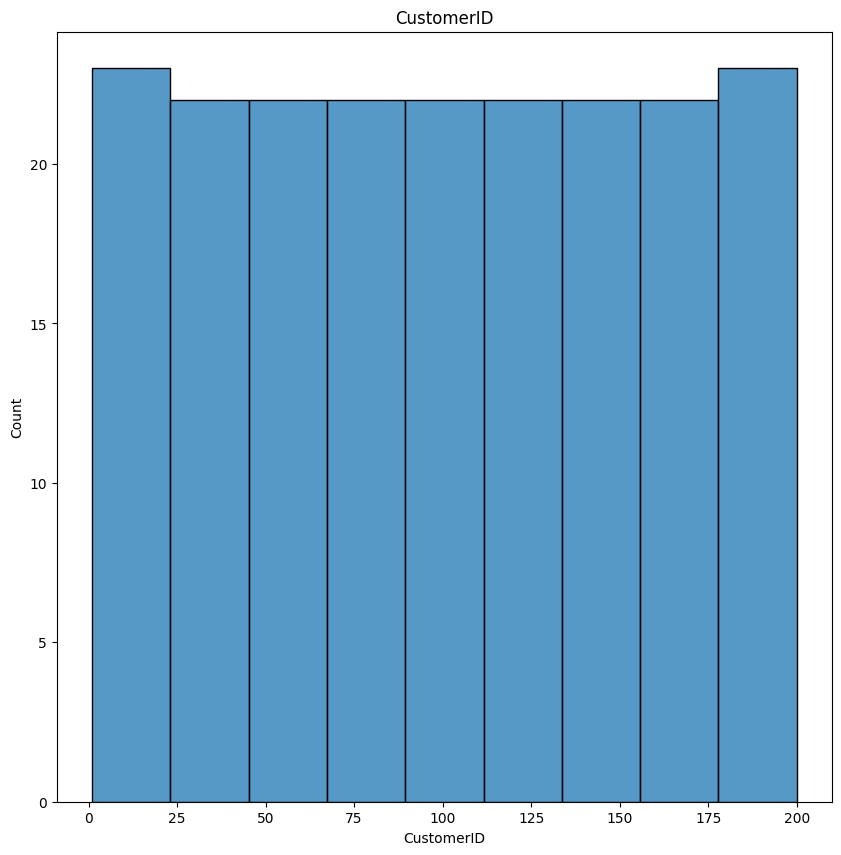

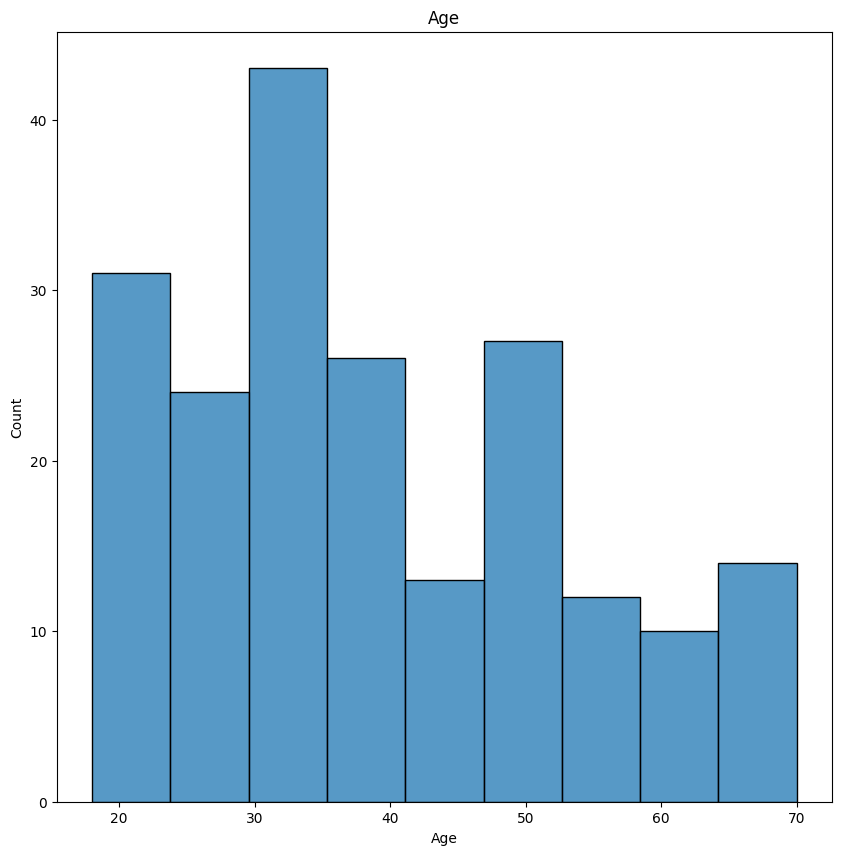

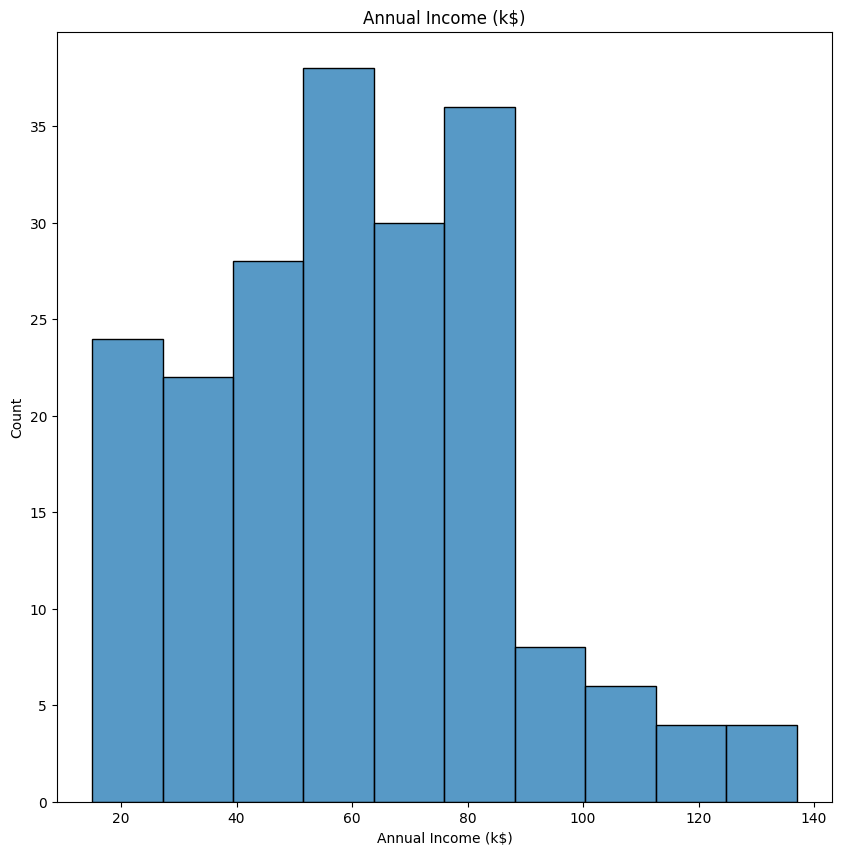

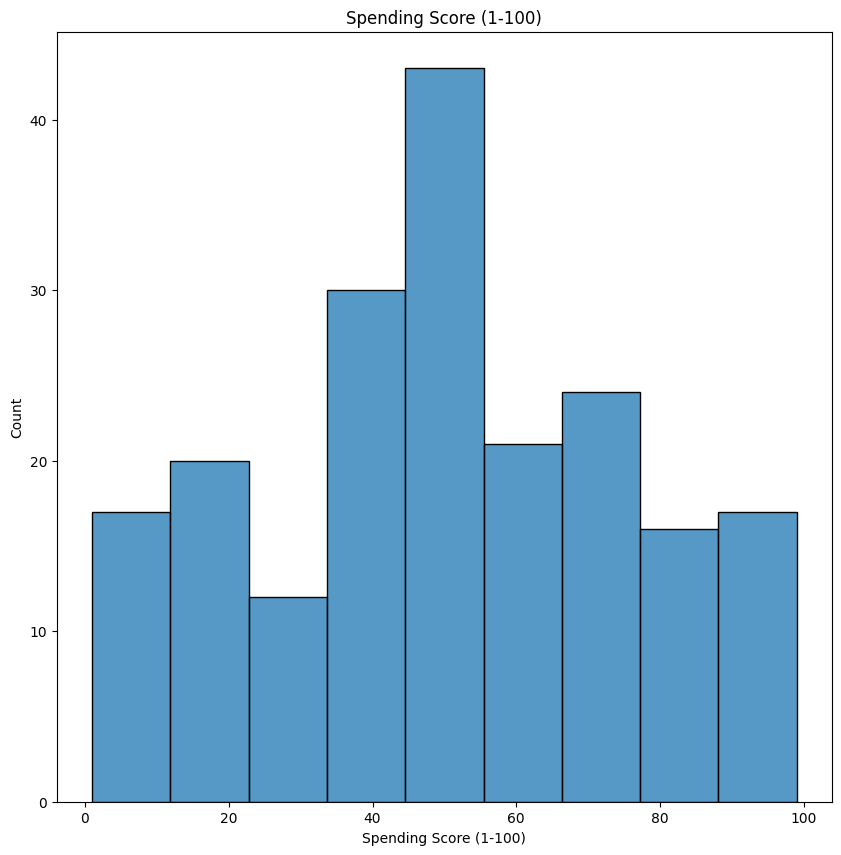

In [16]:
# get the numerical columns of the DataFrame
num_cols = df.select_dtypes(include=['float64','int64']).columns
# create a figure with size (10, 10) for each numerical column
for col in num_cols:
    plt.figure(figsize=(10,10))
    sns.histplot(data=df, x=col)
    plt.title(col)
    plt.show()

In [17]:
#Categorical values graphs
# get the categorical columns of the DataFrame
cat_cols = df.select_dtypes(include=['object','category']).columns

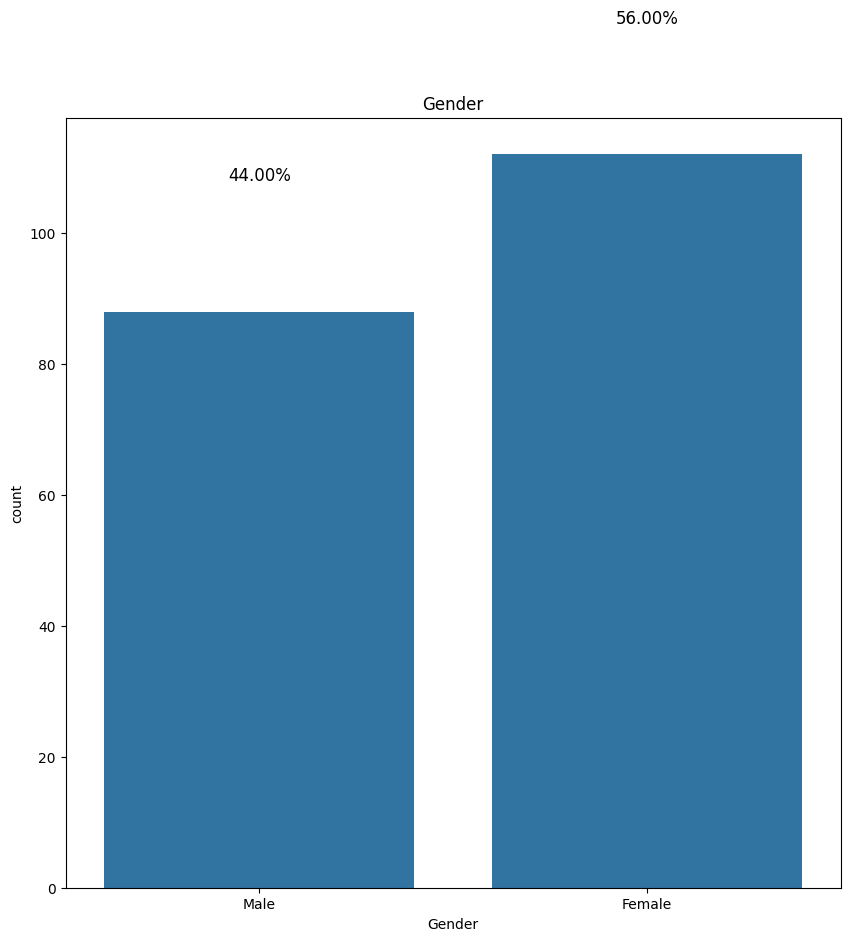

In [18]:
# create a countplot for each categorical column
for col in cat_cols:
    plt.figure(figsize=(10,10))
    ax = sns.countplot(data=df, x=col)
    plt.title(col)
    
    # add percentage labels on each bar
    for p in ax.containers[0].patches:
        percent = (p.get_height()/len(df))*100
        ax.text(p.get_x()+p.get_width()/2,
                p.get_height()+20,
                '{:1.2f}%'.format(percent),
                ha='center', fontsize=12)
    plt.show()

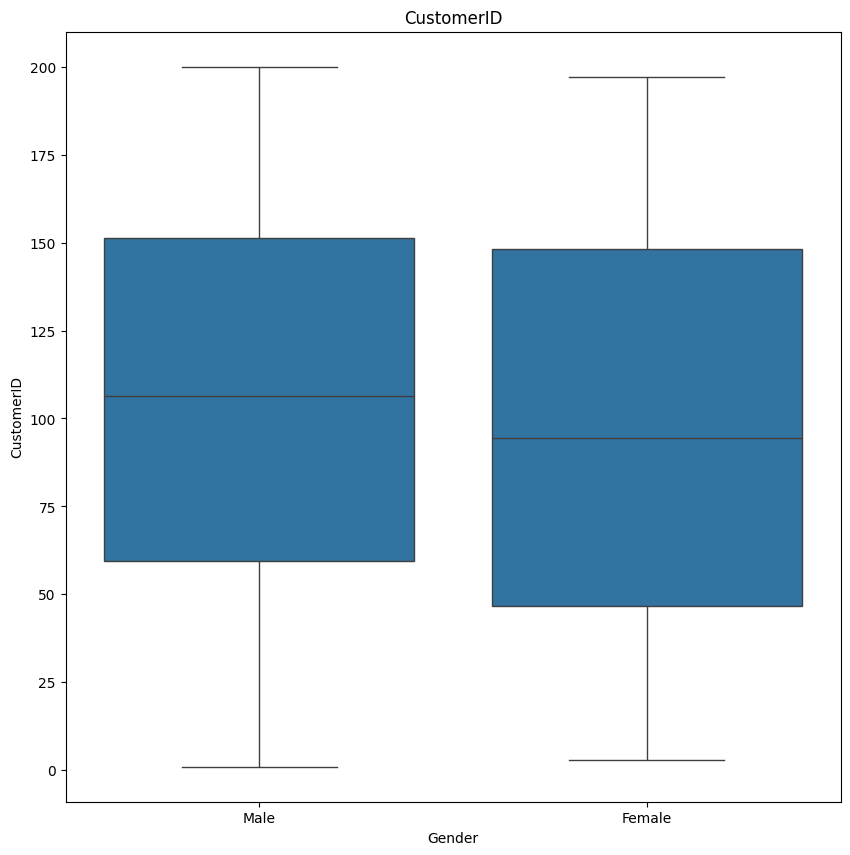

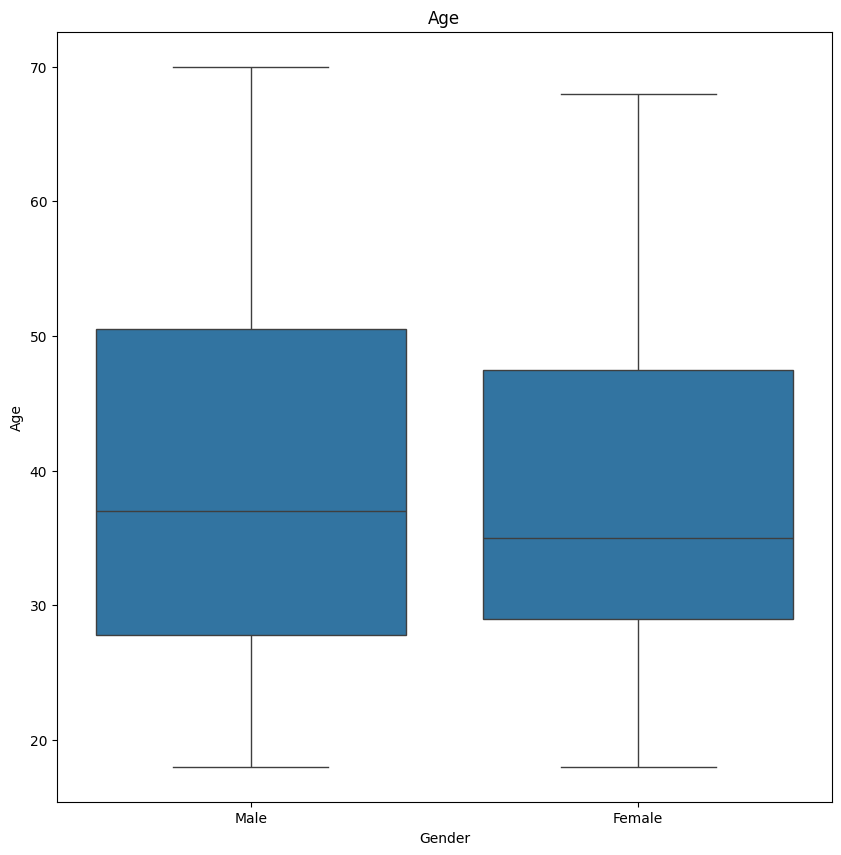

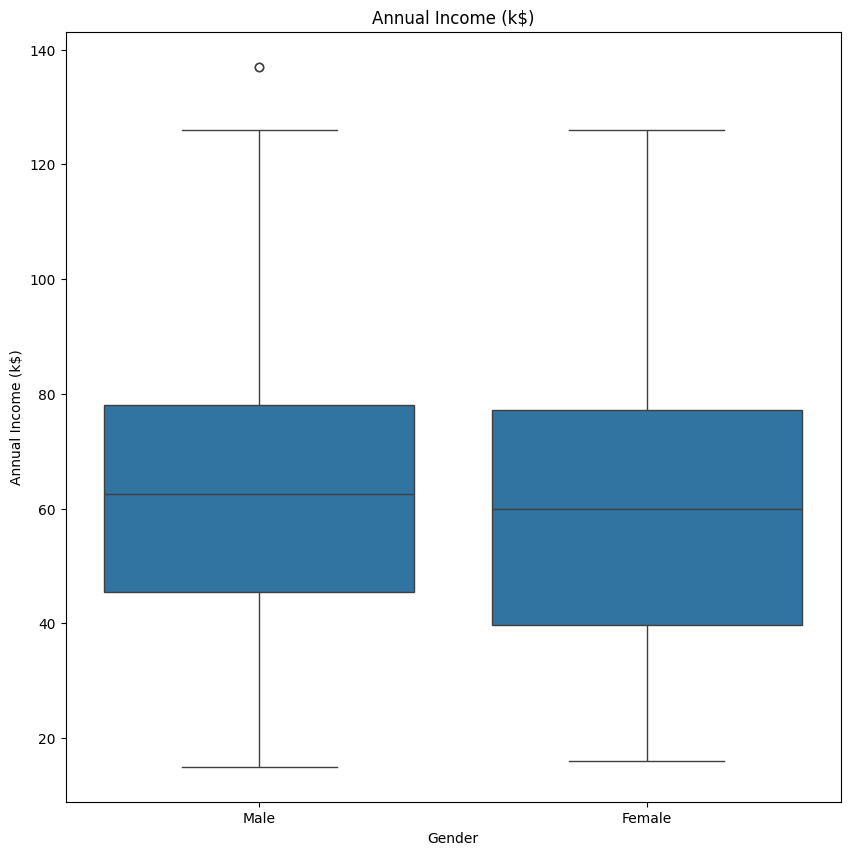

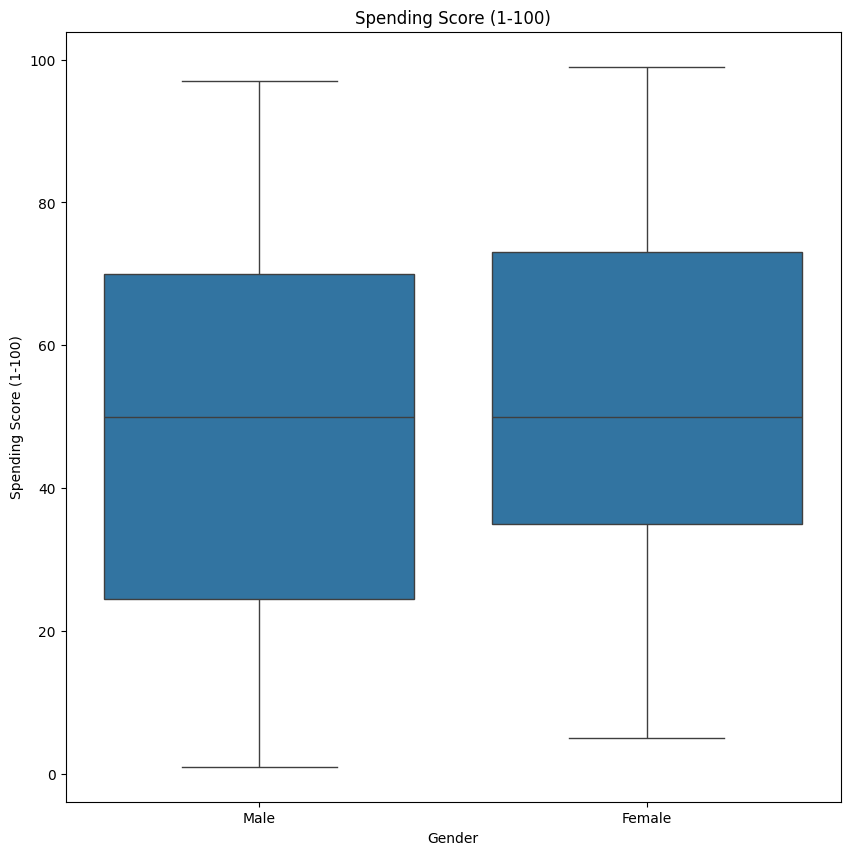

In [19]:
# create a countplot for each categorical column
for col in  df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(10,10))
    ax = sns.boxplot(data=df, y=col, x="Gender")
    plt.title(col)
   
    plt.show()

<br>EXPLORATORY DATA ANALYSIS


In [ ]:
# Kode kita